$ du/dt=d^2u/dx^2 + d^2u/dy^2 +f $

In [1]:
# u=u_D on Domega
#u=u0 at t=0

In [2]:
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt
import scipy
import numpy as np

## Set variables

In [3]:
T=2.0
steps=10
dt=T/steps

## Generate Mesh

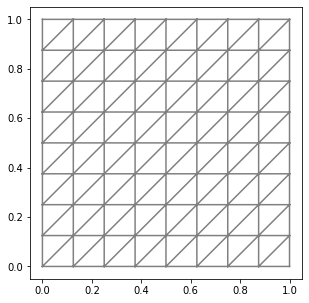

In [4]:
mesh= UnitSquareMesh(8,8)
#display mesh
plt.figure(figsize=(8, 5)) 
display(plot(mesh)) 


## Define the functional space

In [5]:
V=FunctionSpace(mesh,'P',1)

## Define the boundary condition

In [6]:
alpha=3
beta=1.2
#
u_D=Expression('1+x[0]*x[0]+alpha*x[1]*x[1]+beta*t',degree=2,t=0,alpha=alpha,beta=beta)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

## Set the initial condition

In [7]:
#initial condition by interpolation
u_n=interpolate(u_D,V)


## Define the variational problem

In [8]:
# Defining test and trial function
u=TrialFunction(V)
v=TestFunction(V)
f=Constant(beta-2-2*alpha)
# Defining the Function F and converting it into bilnear a(u,v) and linear L(v) form
F=u*v*dx+dt*dot(grad(u),grad(v))*dx-(u_n+dt*f)*v*dx
a,l=lhs(F),rhs(F)


## Computing solution

In [9]:
u=Function(V)
t=0
while(t<T):
    #updating time by dt
    t=t+dt
    #setting t in the u_D expression as updated time
    u_D.t=t
    #solving
    solve(a==l,u,bc)
    #updating the previous solution
    u_n.assign(u)
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('t = %.2f: error = %.3g' % (t, error))

t = 0.20: error = 3.11e-15
t = 0.40: error = 2.66e-15
t = 0.60: error = 3.55e-15
t = 0.80: error = 3.55e-15
t = 1.00: error = 3.55e-15
t = 1.20: error = 4e-15
t = 1.40: error = 4.44e-15
t = 1.60: error = 3.55e-15
t = 1.80: error = 4.44e-15
t = 2.00: error = 4.44e-15
t = 2.20: error = 5.33e-15


## Plot final solution

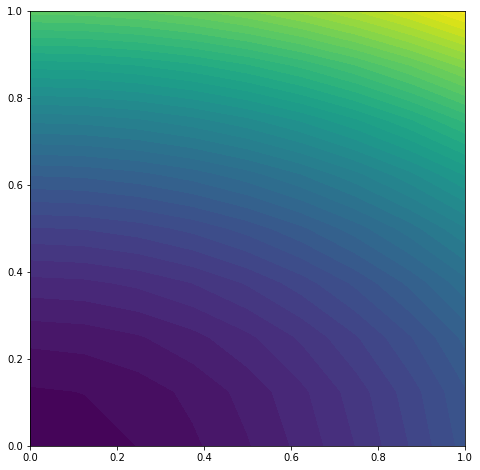

In [10]:
plt.figure(figsize=(10,8))
plot(u)